##Cat and Dog classification with LeNet-style Convolutional Neural Network (CNN) using a binary classification

Load Dataset

In [ ]:
!7z x catdogdataset.zip


7-Zip [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.20GHz (406F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan         
ERROR: No more files
catdogdataset.zip



System ERROR:
Unknown error -2147024872


Data Preprocessing

In [ ]:
!rm -rf catdogdataset/test_set/test_set/cats/*


In [ ]:
import os
for dirpath, dirnames, filenames in os.walk("catdogdataset"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'catdogdataset'.
There are 1 directories and 0 images in 'catdogdataset/training_set'.
There are 2 directories and 0 images in 'catdogdataset/training_set/training_set'.
There are 0 directories and 4005 images in 'catdogdataset/training_set/training_set/dogs'.
There are 0 directories and 4000 images in 'catdogdataset/training_set/training_set/cats'.
There are 1 directories and 0 images in 'catdogdataset/test_set'.
There are 2 directories and 0 images in 'catdogdataset/test_set/test_set'.
There are 0 directories and 1012 images in 'catdogdataset/test_set/test_set/dogs'.
There are 0 directories and 1011 images in 'catdogdataset/test_set/test_set/cats'.


In [ ]:

import os
from collections import defaultdict

file_counts = defaultdict(int)

for dirpath, dirnames, filenames in os.walk("catdogdataset/training_set/training_set/dogs"):
  for filename in filenames:
    file_counts[filename] += 1

for filename, count in file_counts.items():
  if count > 1:
    with open(os.path.join(dirpath, filename), 'wb') as f:
      f.write(open(os.path.join(dirpath, filename), 'rb').read())
    for i in range(1, count):
      os.remove(os.path.join(dirpath, filename))



Data Loaders (batches of images)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "catdogdataset/training_set/training_set/"
test_dir = "catdogdataset/test_set/test_set/"
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


Build the LeNet Model,compile and train

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "catdogdataset/training_set/training_set/"
test_dir = "catdogdataset/test_set/test_set/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
model_8 = Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)), # same input shape as our images
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.Conv2D(10, 3, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_8 = model_8.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
251/251 [==============================] - 73s 286ms/step - loss: 0.6503 - accuracy: 0.6031 - val_loss: 0.6129 - val_accuracy: 0.6337
Epoch 2/5
251/251 [==============================] - 72s 287ms/step - loss: 0.5905 - accuracy: 0.6844 - val_loss: 0.6462 - val_accuracy: 0.6525
Epoch 3/5
251/251 [==============================] - 71s 284ms/step - loss: 0.5356 - accuracy: 0.7305 - val_loss: 0.5548 - val_accuracy: 0.7113
Epoch 4/5
251/251 [==============================] - 72s 287ms/step - loss: 0.4953 - accuracy: 0.7522 - val_loss: 0.5456 - val_accuracy: 0.7286
Epoch 5/5
251/251 [==============================] - 72s 286ms/step - loss: 0.4390 - accuracy: 0.7920 - val_loss: 0.5946 - val_accuracy: 0.7128


Prediction

--2024-05-06 19:06:10--  https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Dobermann_handling.jpg/800px-Dobermann_handling.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 104547 (102K) [image/jpeg]
Saving to: ‘800px-Dobermann_handling.jpg’

800px-Dobermann_han 100%[===================>] 102.10K  --.-KB/s    in 0.05s   

2024-05-06 19:06:10 (2.12 MB/s) - ‘800px-Dobermann_handling.jpg’ saved [104547/104547]



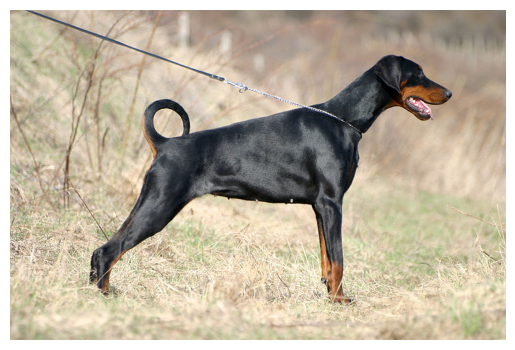

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
!wget https://upload.wikimedia.org/wikipedia/commons/thumb/a/ac/Dobermann_handling.jpg/800px-Dobermann_handling.jpg
photo = mpimg.imread("800px-Dobermann_handling.jpg")
plt.imshow(photo)
plt.axis(False);

In [ ]:
def load_and_prep_image(filename, img_shape=224):

  img = tf.io.read_file(filename)

  img = tf.image.decode_image(img, channels=3)

  img = tf.image.resize(img, size = [img_shape, img_shape])
  img = img/255.
  return img
photo = load_and_prep_image("800px-Dobermann_handling.jpg")
photo = tf.expand_dims(photo, axis=0)

In [ ]:
pred = model_8.predict(photo)
pred

1/1 [==============================] - 0s 26ms/step


array([[0.93562096]], dtype=float32)

In [ ]:
import pathlib
import numpy as np
data_dir = pathlib.Path("catdogdataset/training_set/training_set/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['cats' 'dogs']


In [ ]:
pred_class = class_names[int(tf.round(pred)[0][0])]
pred_class

'dogs'

In [ ]:
def pred_and_plot(model, filename, class_names):
  img = load_and_prep_image(filename)

  pred = model.predict(tf.expand_dims(img, axis=0))

  pred_class = class_names[int(tf.round(pred)[0][0])]

  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 18ms/step


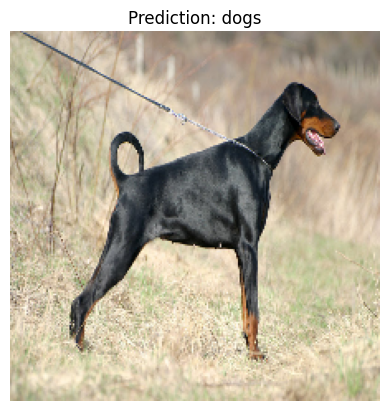

In [ ]:
pred_and_plot(model_8, "800px-Dobermann_handling.jpg", class_names)